<a href="https://colab.research.google.com/github/su951/DL-predection-model/blob/main/Su_Artificial_Intelligence_September_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to match input shape for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for the output
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.7001 - loss: 0.8347 - val_accuracy: 0.8550 - val_loss: 0.3946
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.8501 - loss: 0.4105 - val_accuracy: 0.8795 - val_loss: 0.3279
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 61ms/step - accuracy: 0.8712 - loss: 0.3498 - val_accuracy: 0.8842 - val_loss: 0.3137
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 56ms/step - accuracy: 0.8848 - loss: 0.3178 - val_accuracy: 0.8905 - val_loss: 0.2913
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.8943 - loss: 0.2898 - val_accuracy: 0.8958 - val_loss: 0.2790
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9003 - loss: 0.2731 - val_accuracy: 0.8941 - val_loss: 0.2793
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.9088 - loss: 0.2522 - val_accuracy: 0.9055 - val_loss: 0.2580
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9093 - loss: 0.2453 - 

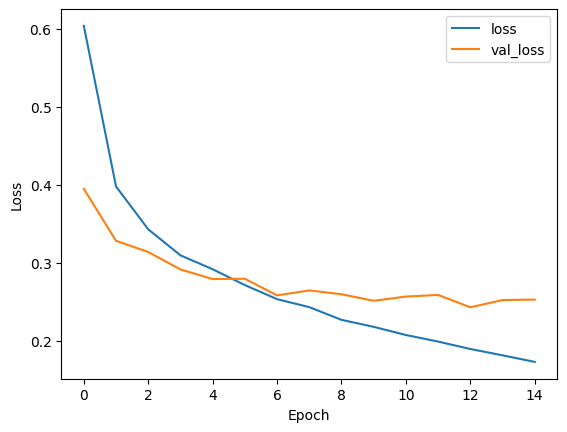

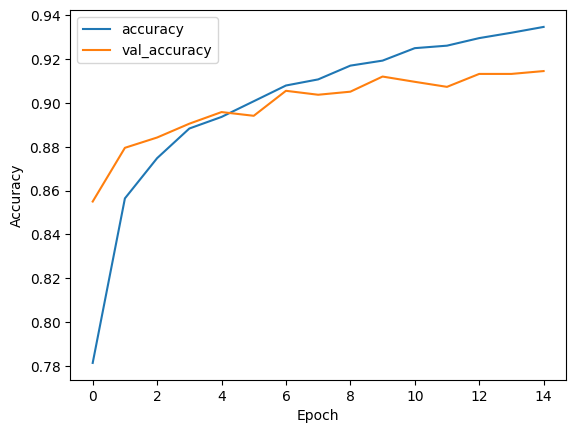

In [ ]:
# Plot loss vs. validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy vs. validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


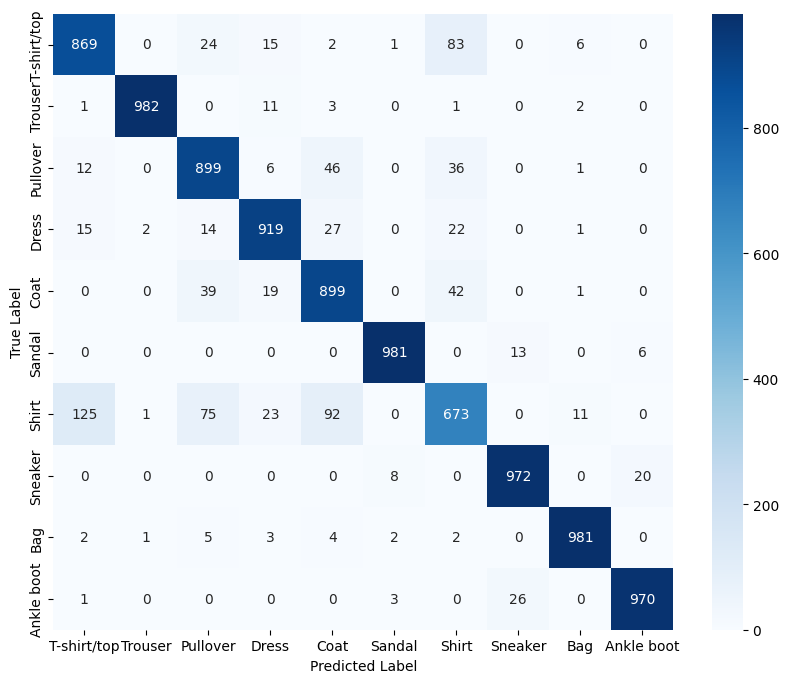

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.90      0.87      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.84      0.90      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.67      0.72      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
], yticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))
